In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]
# comment the downloading and to_pickle of transaction data unless we need to use it again.  I will take 3 years instead of 1.
#df = get_historical_data(list_of_tickers, output_format='pandas', start = '2017-01-01', end = '2019-12-31', close_only = True, volume= False)
#df.to_pickle("./iex3years")

In [5]:
iex_df = pd.read_pickle("./iex3years")
iex_df.drop(columns=['volume'], level=1, inplace=True)
iex_df.columns = iex_df.columns.droplevel(1)
iex_df.sort_index(ascending = True, inplace = True)
iex_df.head(5)

,SPY,AGG
date,,
2017-01-03,225.24,108.17
2017-01-04,226.58,108.20
2017-01-05,226.40,108.65
2017-01-06,227.21,108.29
2017-01-09,226.46,108.47


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [6]:
# Calculate the daily roi for the stocks
daily_return = iex_df.pct_change().dropna()
daily_return.head()

,SPY,AGG
date,,
2017-01-04,0.005949,0.000277
2017-01-05,-0.000794,0.004159
2017-01-06,0.003578,-0.003313
2017-01-09,-0.003301,0.001662
2017-01-10,0.000000,-0.000277


In [7]:
# Calculate volatility
# YOUR CODE HERE
daily_std = daily_return.std()
daily_std

SPY    0.008114
AGG    0.001879
dtype: float64

In [8]:
# Save the last day's closing price
last_day_price = iex_df.iloc[-1] # in later calculation, last closing price is not relevant.
last_day_price

SPY    321.86
AGG    112.37
Name: 2019-12-31 00:00:00, dtype: float64

In [9]:
# If my portfolio is $1, my portfolio should invest $.6 into SPY and $0.4 into AGG no matter what the latest price is:
# Therefore, last closing price is not relevant.  The only thing relevant is mean and std of daily return.
# Next two lines are generating random daily returns for each stock for 30 years before calculating portfolio separately.
# By vectorizing the random generator, we can save loops and computational power.
SPY_sim = np.random.normal(daily_return.mean()[0], daily_std[0],252*30*500).reshape(252*30,500)
AGG_sim = np.random.normal(daily_return.mean()[1], daily_std[1],252*30*500).reshape(252*30,500)
# Next 3 blocks are 3 different methods to calculate portfolio return for 30 years.

In [10]:
# Method 1: Combine daily return (SPY_sim/AGG_sim) then cumprod. This assumes rebalancing daily as in the sample codes.
Portfolio_return = SPY_sim *0.6 + AGG_sim *0.4
Portfolio_30_year = np.cumprod(Portfolio_return + 1, axis = 0)
Portfolio_30_year_simulation = pd.DataFrame(Portfolio_30_year)
Portfolio_30_year_simulation

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.002346,0.998975,1.004309,1.007797,0.999369,0.997436,1.009312,1.003537,0.997907,1.002836,...,0.999866,1.006470,1.002308,0.997632,1.007740,1.003581,0.993436,1.000356,0.996343,0.992947
1,1.006792,1.009326,0.998331,1.009608,0.998655,0.995092,1.007124,1.000033,0.997996,0.998558,...,1.002213,0.995880,1.002291,0.995318,1.003141,1.001206,1.002633,1.002832,0.995416,0.995080
2,1.013681,1.012831,0.998861,1.006542,1.002427,0.995490,1.013095,1.002821,1.003689,0.995216,...,0.999079,1.008150,1.001199,0.997261,1.011928,1.012404,1.012426,1.008689,1.000241,0.999255
3,1.017235,1.010965,0.994799,1.006681,1.001381,0.993733,1.017292,1.007666,1.004361,1.003158,...,1.004107,1.012408,1.006443,1.001512,1.013737,1.017981,1.013200,1.003690,0.999534,0.995667
4,1.012736,1.011815,0.990230,1.005607,0.991943,0.995639,1.017369,1.002928,1.009681,1.007681,...,1.005114,1.009844,1.004341,1.008610,1.007377,1.023262,1.012898,1.001955,1.004028,0.998815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,11.722244,10.381934,9.543950,12.092448,10.990880,22.788888,17.864951,9.949843,21.241845,18.053112,...,14.363028,10.603223,9.029145,11.404323,8.459335,13.378144,20.691431,11.139217,18.007765,8.913188
7556,11.805087,10.352843,9.573119,12.190221,11.065545,22.801253,17.895078,9.871902,21.317038,18.123793,...,14.366489,10.668783,9.061102,11.380770,8.461935,13.473702,20.660227,11.012434,18.004658,9.021136
7557,11.847251,10.285568,9.562511,12.233734,10.970924,22.477974,17.948618,9.850196,21.145642,18.261338,...,14.299084,10.739844,9.039482,11.388044,8.438915,13.538926,20.653995,10.962840,17.958471,9.057162
7558,11.872066,10.275823,9.511159,12.228571,10.909588,22.249304,17.910653,9.856804,21.042702,18.222548,...,14.202756,10.761137,9.043975,11.381363,8.485606,13.571282,20.607688,11.012036,18.035208,9.023997


In [11]:
# Method 2: Assume no rebalance for next 30 years.  Therefore calculate cumprod for each stock and combine by 60/40.  
Portfolio_30_year = np.cumprod(SPY_sim+1, axis = 0)*0.6 + np.cumprod(AGG_sim+1, axis = 0)*0.4
Portfolio_30_year_simulation = pd.DataFrame(Portfolio_30_year)
Portfolio_30_year_simulation

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.002346,0.998975,1.004309,1.007797,0.999369,0.997436,1.009312,1.003537,0.997907,1.002836,...,0.999866,1.006470,1.002308,0.997632,1.007740,1.003581,0.993436,1.000356,0.996343,0.992947
1,1.006804,1.009329,0.998320,1.009633,0.998659,0.995090,1.007111,1.000019,0.997995,0.998552,...,1.002213,0.995829,1.002293,0.995335,1.003117,1.001207,1.002622,1.002826,0.995430,0.995063
2,1.013737,1.012875,0.998848,1.006545,1.002414,0.995488,1.013087,1.002807,1.003685,0.995210,...,0.999078,1.008105,1.001214,0.997277,1.011917,1.012421,1.012463,1.008694,1.000218,0.999238
3,1.017345,1.010976,0.994795,1.006688,1.001368,0.993724,1.017296,1.007668,1.004360,1.003150,...,1.004105,1.012397,1.006416,1.001508,1.013742,1.018040,1.013229,1.003679,0.999512,0.995648
4,1.012834,1.011806,0.990237,1.005604,0.991948,0.995631,1.017377,1.002915,1.009683,1.007695,...,1.005110,1.009787,1.004315,1.008569,1.007341,1.023354,1.012903,1.001944,1.003997,0.998796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,21.665549,21.844304,16.106696,26.513717,21.624351,66.674788,52.782814,20.513466,71.157387,50.464059,...,42.192875,21.279533,18.121646,24.346454,15.424996,29.568862,66.188800,23.733088,44.874659,16.810263
7556,21.892416,21.744836,16.217779,26.825485,21.830725,66.742318,52.889052,20.243344,71.571177,50.818025,...,42.213685,21.465998,18.295369,24.256393,15.453344,29.919138,66.016080,23.306802,44.865595,17.124884
7557,22.021524,21.515882,16.195684,27.018555,21.578384,65.302475,53.103082,20.172816,70.635438,51.440028,...,41.812936,21.694900,18.191140,24.277541,15.405619,30.215881,65.845928,23.110927,44.692219,17.240296
7558,22.096024,21.470085,16.053344,27.033435,21.389723,64.205372,52.862003,20.185707,70.049012,51.227141,...,41.311171,21.741643,18.229156,24.191608,15.561740,30.279657,65.733547,23.266109,45.094354,17.121443


In [12]:
# Method 3: Rebalance every month back to 60/40 between SPY and AGG
# This is closest to reality as portfolio managers do rebalancing periodically. 
# The code can be easily modified to rebalance quarterly, semi-annually or annually.
# This method has to use loop, as the ending balance of each month has to be set as begining balance for next period.
next_beginning_balance = np.ones((1,500))
Portfolio_30_year = np.ones((1,500))
for month in range(360):
    SPY_month_daily_return = np.concatenate((next_beginning_balance,(SPY_sim[month*21:(month+1)*21])+1), axis = 0)
    AGG_month_daily_return = np.concatenate((next_beginning_balance,(AGG_sim[month*21:(month+1)*21])+1), axis = 0)
    portfolio_monthly_return = (np.cumprod(SPY_month_daily_return, axis = 0)*0.6 + 
                                                np.cumprod(AGG_month_daily_return, axis = 0)*0.4)
    next_beginning_balance = (portfolio_monthly_return[-1,:]).reshape(1,500)
    Portfolio_30_year = np.concatenate((Portfolio_30_year,portfolio_monthly_return[1:,:]), axis = 0)
Portfolio_30_year_simulation = pd.DataFrame(Portfolio_30_year[1:])
Portfolio_30_year_simulation

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.002346,0.998975,1.004309,1.007797,0.999369,0.997436,1.009312,1.003537,0.997907,1.002836,...,0.999866,1.006470,1.002308,0.997632,1.007740,1.003581,0.993436,1.000356,0.996343,0.992947
1,1.006804,1.009329,0.998320,1.009633,0.998659,0.995090,1.007111,1.000019,0.997995,0.998552,...,1.002213,0.995829,1.002293,0.995335,1.003117,1.001207,1.002622,1.002826,0.995430,0.995063
2,1.013737,1.012875,0.998848,1.006545,1.002414,0.995488,1.013087,1.002807,1.003685,0.995210,...,0.999078,1.008105,1.001214,0.997277,1.011917,1.012421,1.012463,1.008694,1.000218,0.999238
3,1.017345,1.010976,0.994795,1.006688,1.001368,0.993724,1.017296,1.007668,1.004360,1.003150,...,1.004105,1.012397,1.006416,1.001508,1.013742,1.018040,1.013229,1.003679,0.999512,0.995648
4,1.012834,1.011806,0.990237,1.005604,0.991948,0.995631,1.017377,1.002915,1.009683,1.007695,...,1.005110,1.009787,1.004315,1.008569,1.007341,1.023354,1.012903,1.001944,1.003997,0.998796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,11.784367,10.457550,9.557023,12.164406,11.038824,22.959495,18.032381,9.921001,21.375203,18.230557,...,14.441140,10.691652,8.991156,11.431326,8.500297,13.307134,20.745495,11.177319,18.220427,8.916796
7556,11.866098,10.427822,9.586049,12.261998,11.113682,22.972083,18.062861,9.844915,21.451763,18.300556,...,14.444599,10.759239,9.021856,11.407616,8.503206,13.401514,20.714511,11.051662,18.217280,9.027712
7557,11.907586,10.359208,9.575420,12.305282,11.018634,22.644217,18.117139,9.823776,21.276917,18.437792,...,14.377215,10.833401,9.000631,11.414914,8.479994,13.466197,20.708966,11.003301,18.170435,9.065277
7558,11.932096,10.349230,9.523938,12.300033,10.957200,22.413722,18.078199,9.830380,21.172311,18.399073,...,14.281363,10.854999,9.004877,11.408116,8.527885,13.498358,20.662330,11.051711,18.248307,9.030155


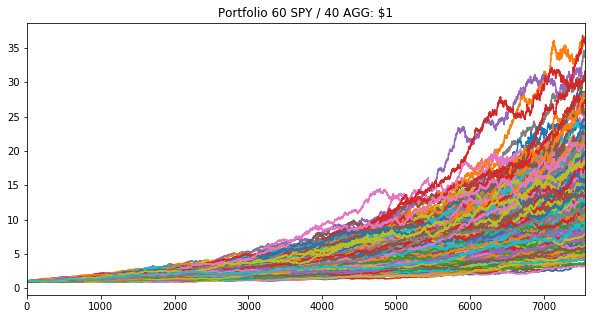

In [15]:
# Visualize the Simulation
Portfolio_30_year_simulation.plot(legend = False, title = "Portfolio 60 SPY / 40 AGG: $1", figsize = (10,5))
plt.savefig("./financial_report_images/simulation.png")

In [16]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
simulation_ending_price_30 = Portfolio_30_year_simulation.iloc[-1]
simulation_ending_price_30

0      11.944552
1      10.285019
2       9.553174
3      12.393751
4      10.955684
         ...    
495    13.509533
496    20.824327
497    11.080849
498    18.246322
499     9.051766
Name: 7559, Length: 500, dtype: float64

In [17]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
simulation_ending_price_20 = Portfolio_30_year_simulation.iloc[252*20-1]
simulation_ending_price_20

0      5.741276
1      4.485809
2      2.779596
3      3.832902
4      5.997045
         ...   
495    6.919579
496    5.383508
497    5.185751
498    7.544786
499    3.376016
Name: 5039, Length: 500, dtype: float64

In [18]:
# Display the 90% confidence interval for the ending returns
quantile_result = simulation_ending_price_30.quantile(q=[0.05, 0.95])
print(f"The 90% confidence interval of 30-year ending price for $1 investment in portfolio \
is between ${int(quantile_result[0.05])} and ${int(quantile_result[.95])}.")

The 90% confidence interval of 30-year ending price for $1 investment in portfolio is between $5 and $21.


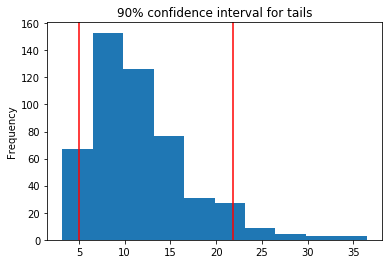

In [19]:
# Visualize the distribution of the ending returns
plt.figure() # this is top-level container for all plot elements, make sure to close it when not suing any more.
simulation_ending_price_30.plot(kind = 'hist', title="90% confidence interval for tails")
plt.axvline(quantile_result.iloc[0], color='r')
plt.axvline(quantile_result.iloc[1], color='r')
plt.savefig("./financial_report_images/confidence_level.png")

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [20]:
# YOUR CODE HERE
quantile_10_50_90=simulation_ending_price_30.quantile(q = [0.10,0.50,0.90])

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [21]:
initial_investment = 20_000
return_10_50_90 = quantile_10_50_90*initial_investment
return_10_50_90.astype(int)

0.1    118794
0.5    212904
0.9    382068
Name: 7559, dtype: int64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [22]:
def efficient_fund(withdraw_rate, initial_investment, simulation_ending_price_30, plaid_projected_annual_income):
    retirement_income = withdraw_rate * (initial_investment * simulation_ending_price_30.quantile(.1))
    if retirement_income > plaid_projected_annual_income:
        answer = "exceeds"
    else:
        answer = "doesn't meet"
    return (f"Your retirement income at 10th percentile and {withdraw_rate} withdraw is ${int(retirement_income)}, \
which {answer} meet current income ${plaid_projected_annual_income}.")

In [23]:
withdraw_rate = 0.04
initial_investment = 20000
plaid_projected_annual_income = 7389
print(efficient_fund(withdraw_rate,initial_investment, simulation_ending_price_30,plaid_projected_annual_income))

Your retirement income at 10th percentile and 0.04 withdraw is $4751, which doesn't meet meet current income $7389.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [24]:
initial_investment *= 1.5
print(efficient_fund(withdraw_rate,initial_investment, simulation_ending_price_30,plaid_projected_annual_income))

Your retirement income at 10th percentile and 0.04 withdraw is $7127, which doesn't meet meet current income $7389.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [25]:
daily_quantiles = Portfolio_30_year_simulation.quantile(q=(0.05,0.5,0.9), axis = 1).T
daily_quantiles

,0.05,0.50,0.90
0,0.992557,1.000380,1.006401
1,0.990358,1.000780,1.009460
2,0.988334,1.001460,1.012267
3,0.986579,1.001587,1.014222
4,0.985710,1.002367,1.016137
...,...,...,...
7555,5.082454,10.561924,19.255405
7556,5.073072,10.625054,19.181588
7557,5.039289,10.615257,19.092319
7558,5.055091,10.642633,19.110328


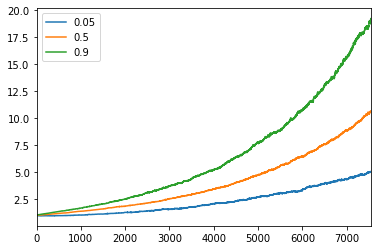

In [26]:
daily_quantiles.plot()
plt.savefig("./financial_report_images/30_year_percentile.png")